In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import tensorflow as tf
import re
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from  tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, GRU
from sklearn.metrics import confusion_matrix,classification_report
import nltk
stopword = set(STOPWORDS)

from tensorflow.keras.layers import BatchNormalization
from keras import regularizers
from bs4 import BeautifulSoup
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
import pandas as pd

fake_data = pd.read_csv("Fake.csv")

real_data = pd.read_csv("True.csv")



In [3]:
fake_data["subject"].value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

In [4]:
real_data["subject"].value_counts()

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

C:\Users\nahul\AppData\Local\Temp\ipykernel_8920\2202566678.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best")


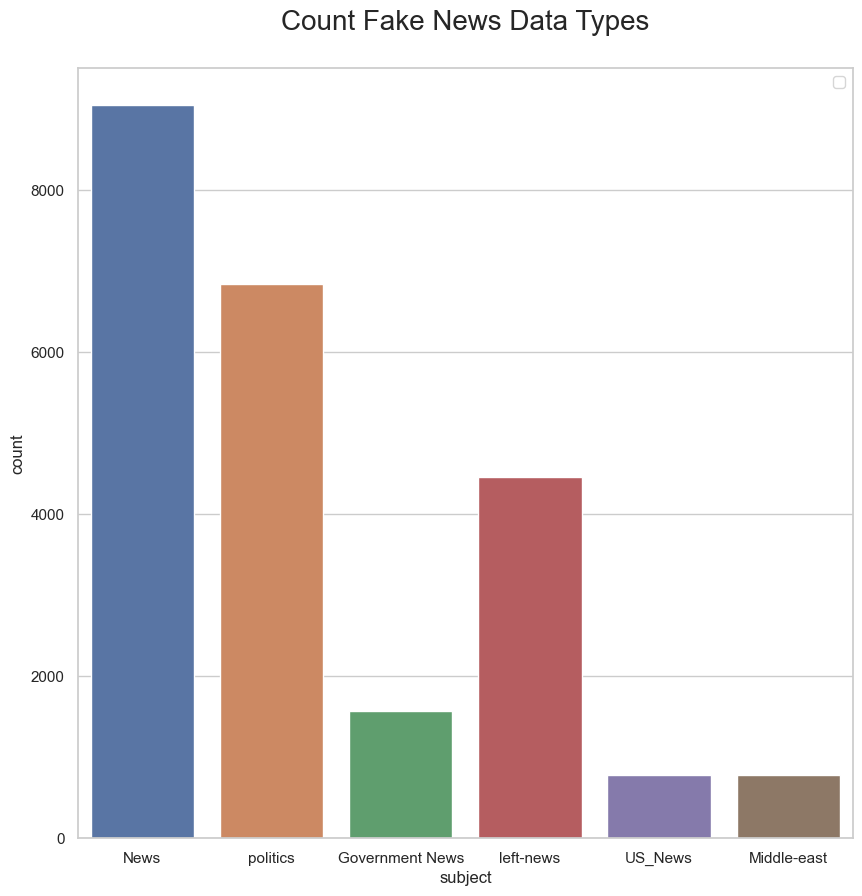

In [5]:
plt.figure(figsize=(10,10))
sns.set_theme(style="whitegrid")
sns.countplot(x="subject",data=fake_data,hue="subject")
plt.title("Count Fake News Data Types\n",fontsize=20)
plt.legend(loc="best")
plt.show()

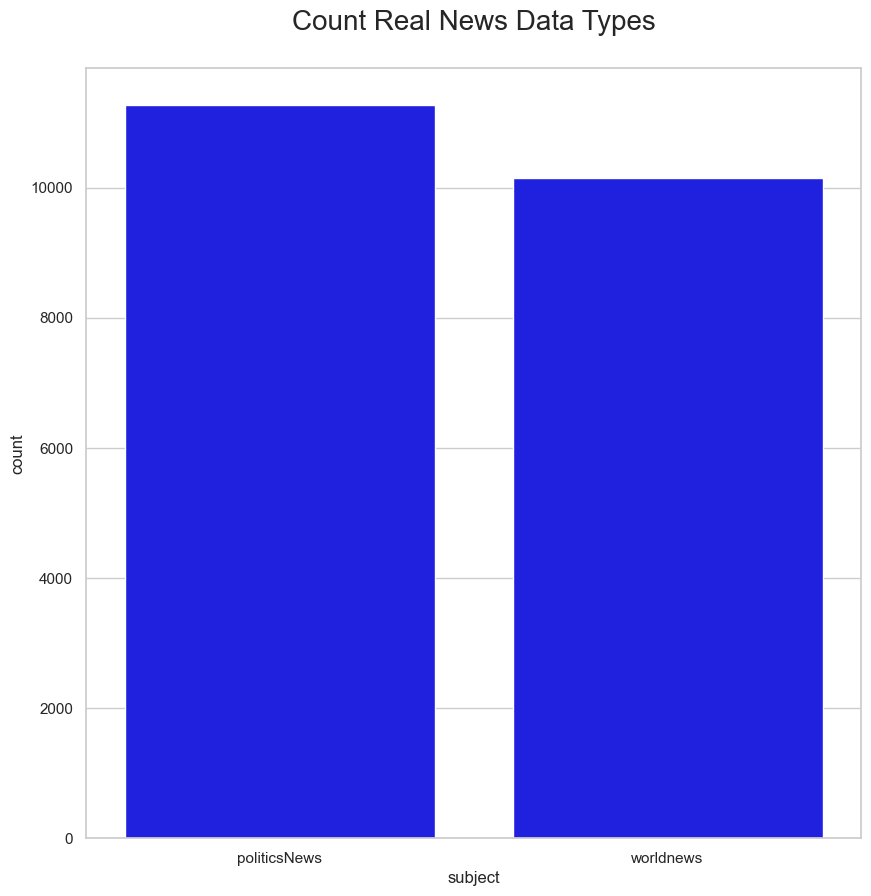

In [6]:
plt.figure(figsize=(10,10))
sns.countplot(x=real_data["subject"],color='blue')
plt.title("Count Real News Data Types\n",fontsize=20)
plt.show()

In [7]:
fake_text=" ".join(fake_data["text"].tolist())


In [8]:
unknown_publishers=[]
for index,row in enumerate(real_data.text.values):
   try:
     record=row.split("-",  maxsplit=1)
     record[1]
     
     assert(len(record[0])<120)
   except:
    unknown_publishers.append(index)

In [9]:
real_data.iloc[unknown_publishers].text


7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [10]:
real_data=real_data.drop(8970,axis=0)

In [11]:
publisher=[]
temp_text=[]
for index,row in enumerate(real_data.text.values):
  if index in unknown_publishers:
    temp_text.append(row)
    publisher.append("unknow")
  else:
    record=row.split("-",maxsplit=1)
    publisher.append(record[0].strip())
    temp_text.append(record[1].strip())

In [12]:
real_data["publisher"]=publisher
real_data["text"]=temp_text

In [13]:
real_data.sample(5)


,title,text,subject,date,publisher
14935,Greens hold out on climate in German coalition...,Environmental policy dominated negotiations on...,worldnews,"November 13, 2017",BERLIN (Reuters)
6064,"Trump narrows high court search, to name conse...","President Donald Trump, poised to restore the ...",politicsNews,"January 24, 2017",WASHINGTON (Reuters)
1038,Bipartisan Obamacare fix would cut U.S. defici...,A bipartisan Senate proposal to shore up Obama...,politicsNews,"October 25, 2017",WASHINGTON (Reuters)
7094,Trump keeping 'open mind' on pulling out of cl...,U.S. President-elect Donald Trump said on Tues...,politicsNews,"November 22, 2016",NEW YORK (Reuters)
14841,EU Commission defends Malta on money launderin...,A top European Commission official defended Ma...,worldnews,"November 14, 2017",BRUSSELS (Reuters)


In [14]:
empty_fake_index=[index for index,text in enumerate(fake_data.text.tolist()) if str(text).strip()==""]


In [15]:
fake_data.iloc[empty_fake_index]


,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [16]:
real_data["text"] =real_data["title"]+""+ real_data["text"]
fake_data["text"] =fake_data["title"]+""+ fake_data["text"]


In [17]:
real_data["text"]=real_data["text"].apply(lambda x:str(x).lower())
fake_data["text"]=fake_data["text"].apply(lambda x:str(x).lower())

In [18]:
real_data["label"]=1
fake_data["label"]=0

In [19]:
real_data=real_data[["text","label"]]

In [20]:
fake_data=fake_data[["text","label"]]


In [21]:
final_data = pd.concat([real_data, fake_data], ignore_index=True)


In [22]:
final_data.sample(5)


,text,label
32600,did obama rob fannie & freddie of billions? dr...,0
13897,eu's juncker says dec. 4 meeting with may will...,1
3331,trump pushes infrastructure plan as russia pro...,1
43433,mccain’s mad world and the cancer of conflict2...,0
14045,egypt housing minister to head government whil...,1


In [23]:
final_data.shape


(44897, 2)

C:\Users\nahul\AppData\Local\Temp\ipykernel_8920\708421424.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best")


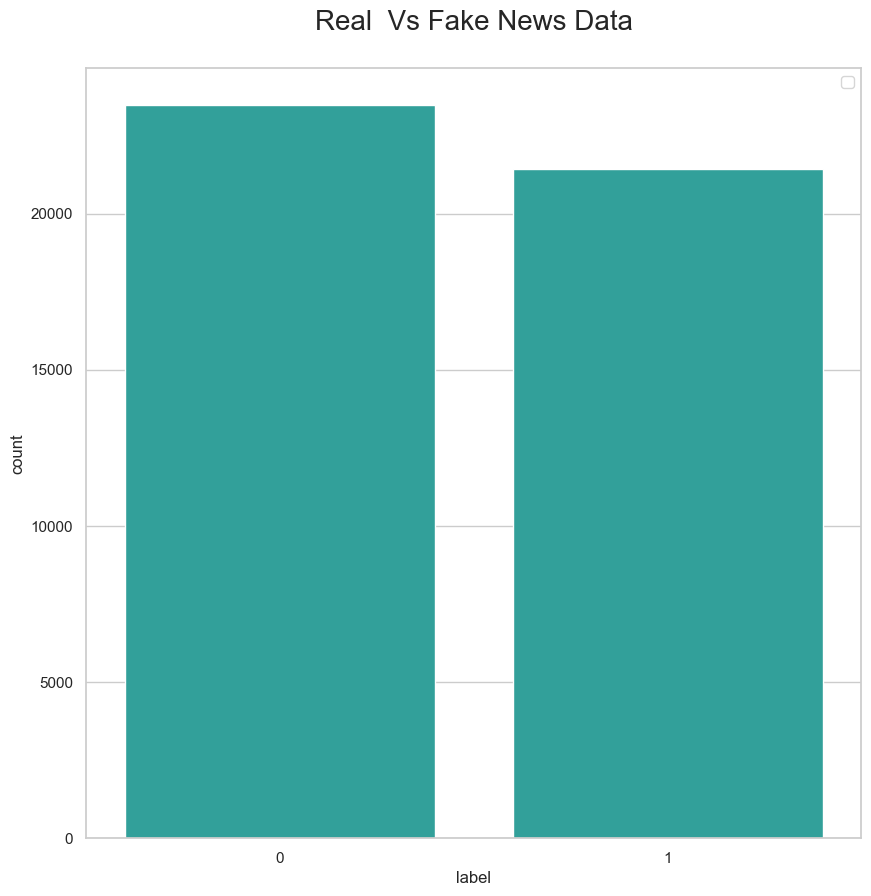

In [24]:
plt.figure(figsize=(10,10))
sns.countplot(x="label",data=final_data,color="lightseagreen")
plt.title("Real  Vs Fake News Data\n",fontsize=20)
plt.legend(loc="best")
plt.show()

In [25]:
import spacy
import os
from nltk.corpus import stopwords
import preprocess_kgptalkie as ps

# Ensure the spaCy model is available
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("Downloading 'en_core_web_sm' model...")
    os.system("python -m spacy download en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

# Ensure NLTK stopwords are downloaded
import nltk
try:
    stopwords_list = stopwords.words("english")
except LookupError:
    print("Downloading NLTK stopwords...")
    nltk.download("stopwords")
    stopwords_list = stopwords.words("english")

print(stopwords_list)


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [26]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string
from bs4 import BeautifulSoup

def clean_text(text):
    if isinstance(text, str):
        text = BeautifulSoup(text, 'html.parser').get_text()
        text = re.sub(r"[^a-zA-Z]", " ", text)
        text = text.translate(str.maketrans("", "", string.punctuation))
        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"
                                   u"\U0001F300-\U0001F5FF"
                                   u"\U0001F680-\U0001F6FF"
                                   u"\U0001F1E0-\U0001F1FF"
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   "]+", flags=re.UNICODE)
        text = emoji_pattern.sub(r'', text)

        text = re.sub(r"#.*", "", text)
        text = re.sub(r"/\*.*?\*/", "", text, flags=re.DOTALL)
        text = text.lower()

       
        nltk_stop_words = set(stopwords.words('english'))
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in nltk_stop_words]

        text = ' '.join(tokens)


        return text
    else:
        return ""

In [27]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\nahul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [28]:
final_data["text"] = final_data["text"].apply(clean_text)

C:\Users\nahul\AppData\Local\Temp\ipykernel_8920\2877970222.py:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()
C:\Users\nahul\AppData\Local\Temp\ipykernel_8920\2877970222.py:9: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


In [29]:
text_data=final_data["text"].copy()


In [30]:
label_data=final_data["label"].values


In [31]:
corpus = []
for i in range(0, len(text_data)):
    review = text_data[i]
    review = review.split()
    review = ' '.join(review)
    corpus.append(review)

In [32]:
embedding_dim=100


In [33]:
vocab_size = 20000
onehot_encoding=[one_hot(words,vocab_size)for words in corpus] 

In [34]:
max_len=1000
embedded_docs=pad_sequences(onehot_encoding,maxlen=max_len,padding='pre')

In [35]:
X_data=np.array(embedded_docs)
Y_label=np.array(label_data)

#create GRU model

In [36]:
X_train,X_test, Y_train,Y_test = train_test_split(X_data,Y_label, test_size=0.3, random_state=42,shuffle=True)

In [37]:
model=Sequential()
model.add(Embedding(vocab_size,embedding_dim,input_shape=(max_len,),trainable=False))
model.add(BatchNormalization())
model.add(GRU(units=128,activation="tanh",kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.summary()

c:\Users\nahul\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 1000, 100)      │     2,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1000, 100)      │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 128)            │        88,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,089,873 (7.97 MB)

 Trainable params: 89,161 (348.29 KB)

 Non-trainable params: 2,000,712 (7.63 MB)

In [38]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1,patience=50)


In [39]:
history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size=42,callbacks=[callback])


Epoch 1/10
749/749 ━━━━━━━━━━━━━━━━━━━━ 704s 938ms/step - accuracy: 0.8589 - loss: 0.3322 - val_accuracy: 0.9597 - val_loss: 0.1230
Epoch 2/10
749/749 ━━━━━━━━━━━━━━━━━━━━ 510s 682ms/step - accuracy: 0.9799 - loss: 0.0754 - val_accuracy: 0.9778 - val_loss: 0.0831
Epoch 3/10
749/749 ━━━━━━━━━━━━━━━━━━━━ 511s 682ms/step - accuracy: 0.9896 - loss: 0.0444 - val_accuracy: 0.9808 - val_loss: 0.0699
Epoch 4/10
749/749 ━━━━━━━━━━━━━━━━━━━━ 511s 682ms/step - accuracy: 0.9928 - loss: 0.0363 - val_accuracy: 0.9938 - val_loss: 0.0370
Epoch 5/10
749/749 ━━━━━━━━━━━━━━━━━━━━ 521s 696ms/step - accuracy: 0.9937 - loss: 0.0327 - val_accuracy: 0.9909 - val_loss: 0.0446
Epoch 6/10
749/749 ━━━━━━━━━━━━━━━━━━━━ 543s 725ms/step - accuracy: 0.9963 - loss: 0.0273 - val_accuracy: 0.9941 - val_loss: 0.0358
Epoch 7/10
749/749 ━━━━━━━━━━━━━━━━━━━━ 504s 674ms/step - accuracy: 0.9950 - loss: 0.0303 - val_accuracy: 0.9652 - val_loss: 0.1215
Epoch 8/10
749/749 ━━━━━━━━━━━━━━━━━━━━ 543s 725ms/step - accuracy: 0.9963 -

In [41]:
def model_loss_and_accuracy(history):
    
    fig=plt.figure(figsize=(10,10))
    plt.subplot(221)
    plt.plot(history.history["accuracy"],"b*--",label="accuracy")
    plt.plot(history.history["val_accuracy"],"r*--",label="val_accuracy")
    plt.title("Model Accuracy")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Accuracy")
    plt.grid(color = 'green', linestyle = '--', linewidth = 1)
    plt.legend(loc="best")
    plt.tight_layout()

    plt.subplot(222)
    plt.plot(history.history["loss"],"b*--",label="loss")
    plt.plot(history.history["val_loss"],"r*--",label="val_loss")
    plt.title("Model Loss")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss")
    plt.grid(color = 'green', linestyle = '--', linewidth = 1)
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

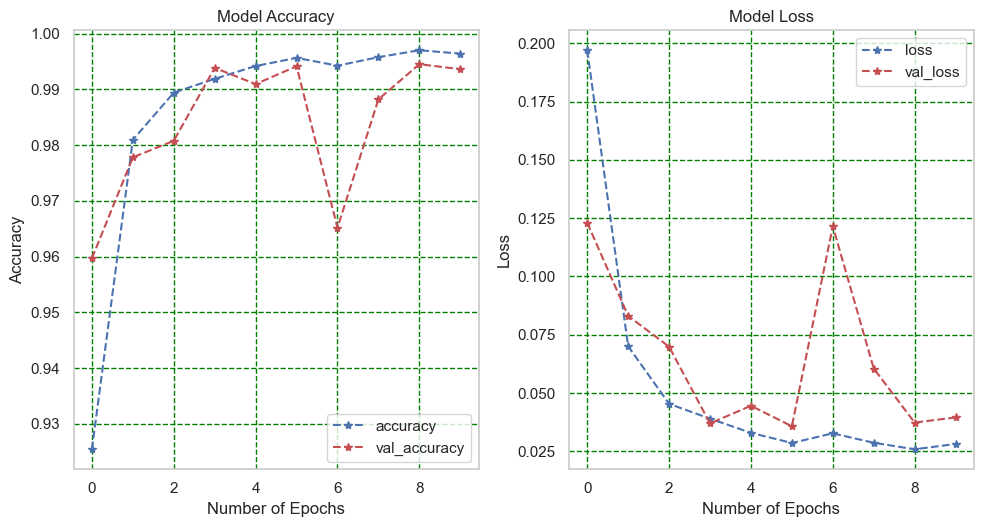

In [42]:
model_loss_and_accuracy(history)


In [43]:
class_name=["Fake","Real"]


In [44]:
predict_label=(model.predict(X_test) > 0.5).astype("int32")
confusion_matrix = confusion_matrix(Y_test,predict_label)

421/421 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step


In [45]:
confusion_matrix_label = ["True Negative","False Negative","False Positive","True Positive"]
confusion_matrix_value_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]
confusion_matrix_value_percentage= ["{0:.2%}".format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
confusion_matrix_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(confusion_matrix_label,confusion_matrix_value_counts ,confusion_matrix_value_percentage)]
confusion_matrix_labels = np.asarray(confusion_matrix_labels).reshape(2,2)

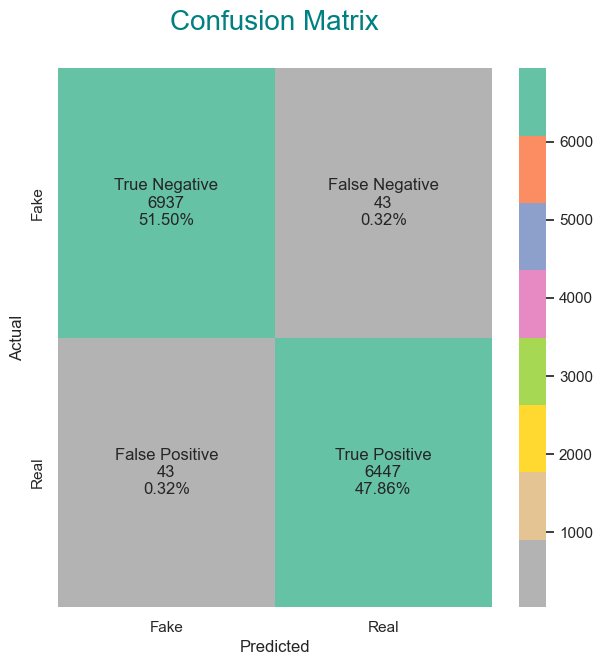

In [46]:
plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=confusion_matrix_labels, fmt="", cmap='Set2_r',xticklabels=class_name,yticklabels=class_name)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix\n",fontsize=20,color="teal")
plt.show()

In [47]:
print(classification_report(Y_test,predict_label,target_names=["Fake","Real"]))


              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      6980
        Real       0.99      0.99      0.99      6490

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



In [66]:
custom_data="Donald Trump Makes History With Zero Major Newspaper Endorsements"

In [67]:
test_data= []
for i in range(0, len(custom_data)):
    review =custom_data[i]
    review = review.split()
    review = ' '.join(review)
    test_data.append(review)

In [68]:
voc_size = 100
onehot_repr=[one_hot(words,voc_size)for words in test_data]
sent_length=20
embedded_docs=pad_sequences(onehot_repr,maxlen=sent_length,padding='pre')
test_data=np.array(embedded_docs)

In [69]:
prediction=(model.predict(test_data)>0.5).astype(int)

if(prediction[0]==0):
  print("News is Fake")
else:
  print("News is Real")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
News is Fake
